In [2]:
library('ggplot2')
library('dplyr')

In [3]:
# Loading train and test data
train <- read.csv('data/train.csv')
test <- read.csv('data/test.csv')

In [4]:
print("Train Dimensions: ")
print(dim(train))
print("Test Dimensions: ")
print(dim(test))

[1] "Train Dimensions: "
[1] 8523   12
[1] "Test Dimensions: "
[1] 5681   11


In [5]:
print(colnames(train))

 [1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"        


In [6]:
print(colnames(test))

 [1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"              


In [7]:
# Create and placehold test column for item outlet sales
test$Item_Outlet_Sales <- 0

In [8]:
# Checking for null values of each column
colSums(is.na(train))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                      1463                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                         0 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                        0                         0                         0

In [9]:
colSums(is.na(test))

Item_Identifier               Item_Weight          Item_Fat_Content 
                        0                       976                         0 
          Item_Visibility                 Item_Type                  Item_MRP 
                        0                         0                         0 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                        0                         0                         0 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                        0                         0                         0

In [10]:
# Stats of our train data
summary(train)

 Item_Identifier  Item_Weight     Item_Fat_Content Item_Visibility  
 FDG33  :  10    Min.   : 4.555   LF     : 316     Min.   :0.00000  
 FDW13  :  10    1st Qu.: 8.774   low fat: 112     1st Qu.:0.02699  
 DRE49  :   9    Median :12.600   Low Fat:5089     Median :0.05393  
 DRN47  :   9    Mean   :12.858   reg    : 117     Mean   :0.06613  
 FDD38  :   9    3rd Qu.:16.850   Regular:2889     3rd Qu.:0.09459  
 FDF52  :   9    Max.   :21.350                    Max.   :0.32839  
 (Other):8467    NA's   :1463                                       
                 Item_Type       Item_MRP      Outlet_Identifier
 Fruits and Vegetables:1232   Min.   : 31.29   OUT027 : 935     
 Snack Foods          :1200   1st Qu.: 93.83   OUT013 : 932     
 Household            : 910   Median :143.01   OUT035 : 930     
 Frozen Foods         : 856   Mean   :140.99   OUT046 : 930     
 Dairy                : 682   3rd Qu.:185.64   OUT049 : 930     
 Canned               : 649   Max.   :266.89   OUT045 : 92

### Dealing with Null Values

In [11]:
# Since we were missing Item_Weight lets look at the statistics
summary(train['Item_Weight'])

  Item_Weight    
 Min.   : 4.555  
 1st Qu.: 8.774  
 Median :12.600  
 Mean   :12.858  
 3rd Qu.:16.850  
 Max.   :21.350  
 NA's   :1463    

In [12]:
summary(test['Item_Weight'])

  Item_Weight    
 Min.   : 4.555  
 1st Qu.: 8.645  
 Median :12.500  
 Mean   :12.696  
 3rd Qu.:16.700  
 Max.   :21.350  
 NA's   :976     

In [13]:
# We could use the mean, but since we have categorical data, we should use pivot tables.

# I plan on using the outlet location type, and the item type.
average_weights_train <- train %>% group_by(Outlet_Location_Type,Item_Type) %>% summarise(Average_Weight = mean(Item_Weight))
average_weights_train

Outlet_Location_Type,Item_Type,Average_Weight
Tier 1,Baking Goods,NA
Tier 1,Breads,NA
Tier 1,Breakfast,NA
Tier 1,Canned,NA
Tier 1,Dairy,NA
Tier 1,Frozen Foods,NA
Tier 1,Fruits and Vegetables,NA
Tier 1,Hard Drinks,NA
Tier 1,Health and Hygiene,NA
Tier 1,Household,NA


In [14]:
# After our pivot table, we notice that only tier 1 and tier 3 location types don't have values. We'll use tier 2 values to fill.
average_weights_train[average_weights_train$Outlet_Location_Type == 'Tier 1',]['Average_Weight'] = 
                average_weights_train[average_weights_train$Outlet_Location_Type == 'Tier 2',]['Average_Weight']
average_weights_train[average_weights_train$Outlet_Location_Type == 'Tier 3',]['Average_Weight'] = 
                average_weights_train[average_weights_train$Outlet_Location_Type == 'Tier 2',]['Average_Weight']

In [15]:
average_weights_train

Outlet_Location_Type,Item_Type,Average_Weight
Tier 1,Baking Goods,12.43846
Tier 1,Breads,11.24887
Tier 1,Breakfast,12.72969
Tier 1,Canned,12.33847
Tier 1,Dairy,13.17937
Tier 1,Frozen Foods,12.92973
Tier 1,Fruits and Vegetables,13.08297
Tier 1,Hard Drinks,11.64750
Tier 1,Health and Hygiene,12.87494
Tier 1,Household,13.04105


In [ ]:
# Putting them back into our train dataset.

### Visibility that is less than 0.2 seems to be the best. This is good to note when we train our data.

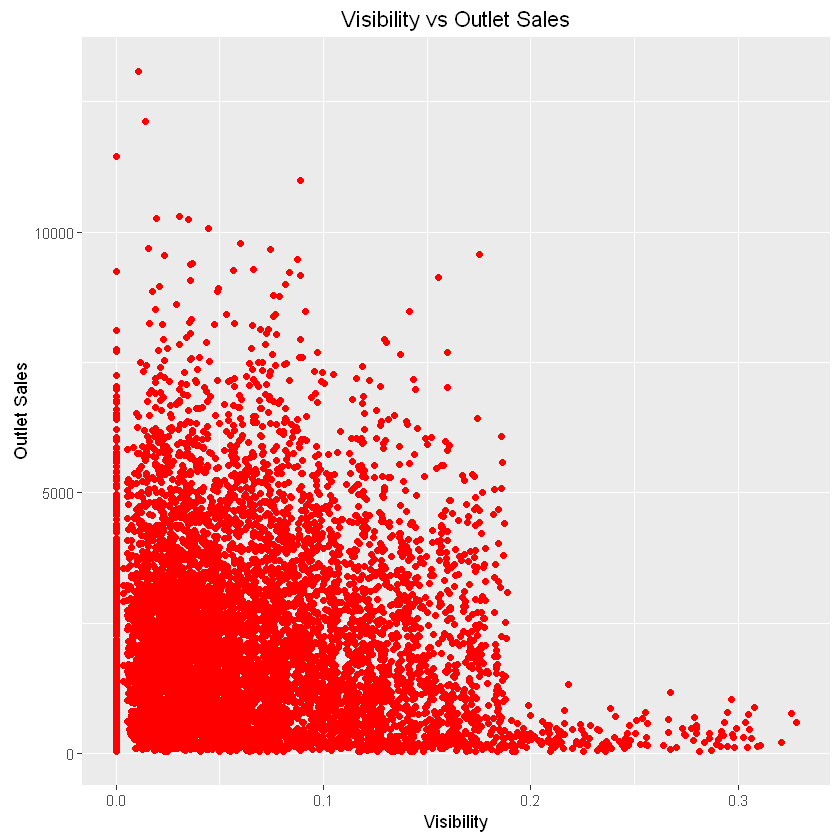

In [16]:
# A question a lot of companies ask is how much their products get sold depending on their visibility
ggplot(train, aes(x= Item_Visibility, y = Item_Outlet_Sales)) + 
geom_point(size = 1.5, color = 'red') +
xlab("Visibility") +
ylab("Outlet Sales") +
ggtitle("Visibility vs Outlet Sales")

### Now the company knows fruits and vegetables are the best selling, and snack foods aren't too far behind.

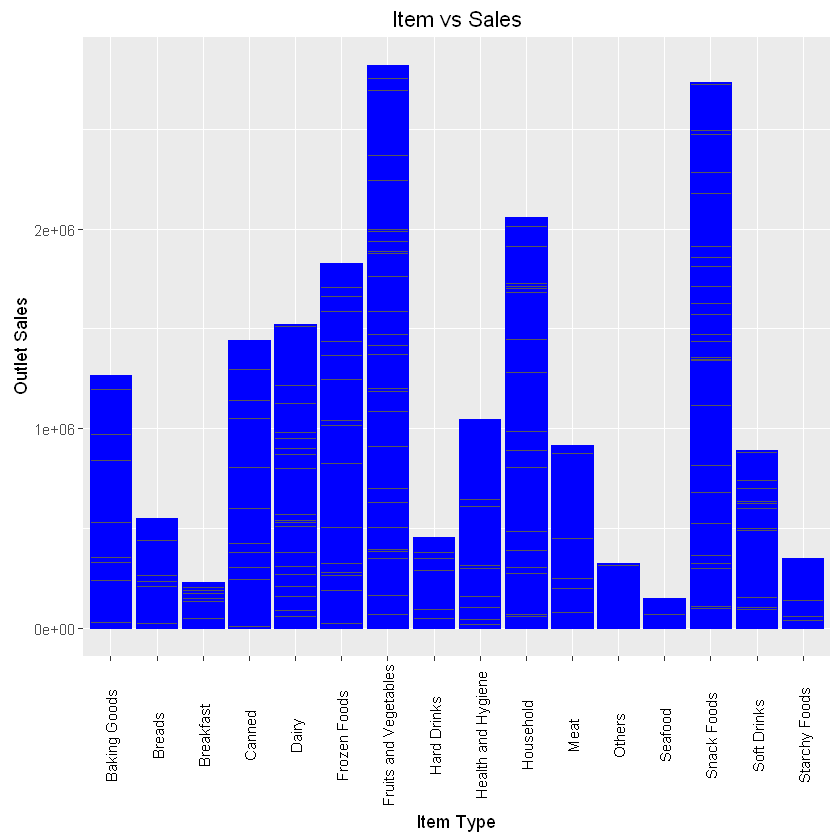

In [17]:
# Another big thing companies like knowing is how much products are sold of each item type.
ggplot(train, aes(x = Item_Type, y = Item_Outlet_Sales)) + 
geom_bar(stat = 'identity', color = 'blue') +
theme(axis.text.x =  element_text(angle = 90, vjust = 0.5, color = 'black')) + 
xlab("Item Type") +
ylab("Outlet Sales") +
ggtitle("Item vs Sales")

### Though best selling, doesn't neccesarily mean most profitable. It also seems we have an outlier.

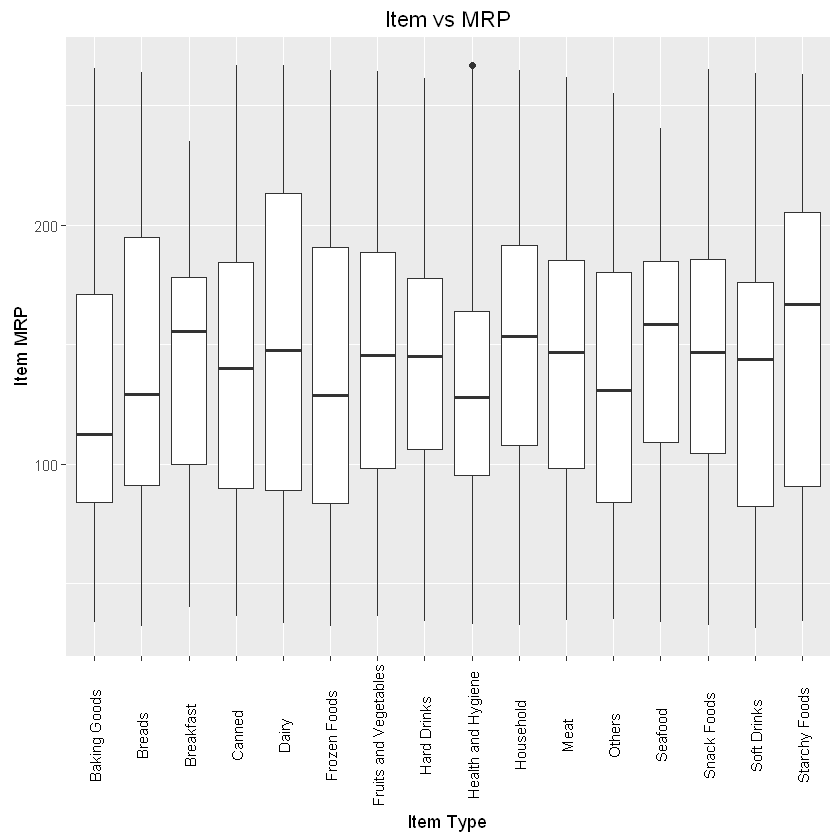

In [18]:
# Another big thing companies like knowing is how much money is being made of each item type.
ggplot(train, aes(x = Item_Type, y = Item_MRP)) + 
geom_boxplot() +
theme(axis.text.x =  element_text(angle = 90, vjust = 0.5, color = 'black')) + 
xlab("Item Type") +
ylab("Item MRP") +
ggtitle("Item vs MRP")